In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
from nltk.corpus import stopwords

# Removing stop words
stop_words = stopwords.words('english')

### Benign Texts (960 texts)

In [17]:
my_benign = []
f = open('11_benign_seq','r', encoding = "UTF-8")

for line in f:
    my_benign.append(line.strip())
len(my_benign)

964

In [18]:
ben_tokenized = []
for sentence in my_benign:
    sentence = sentence.lower().split()
    ben_tokenized.append(sentence)

In [19]:
ben_tokenized_new = []
for line in ben_tokenized:
    line = [w for w in line if w not in stop_words]
    ben_tokenized_new.append(line)

In [20]:
len(ben_tokenized_new)

964

In [21]:
ben_score = []
for i in range(0,len(ben_tokenized_new)-1):
    distance = word2vec.wmdistance(ben_tokenized_new[i], ben_tokenized_new[i+1])
    ben_score.append(distance)
    #print(f'Distance between sentence {i+1} and sentence {i+2} is: {distance}')

Text(0, 0.5, 'Density')

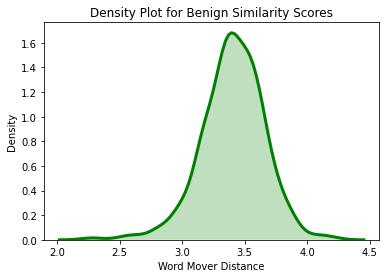

In [22]:
# Density Plot and Histogram of all benign scores
sns.distplot(ben_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

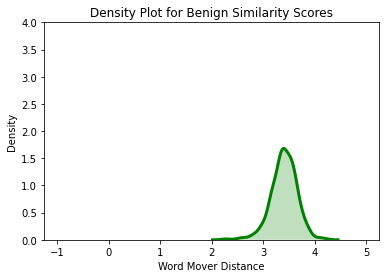

In [23]:
# Density Plot and Histogram of all benign scores
sns.distplot(ben_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-1.25, 5.25),ylim=(0, 4))
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

### PAUSE - get rid of inf by removing sentences from dataset

In [16]:
import math
for i in range(len(ben_score)):
    if ben_score[i] == math.inf:
        print(i)

896
897


In [11]:
max(ben_score)

inf

### Continue

In [24]:
max(ben_score)

4.260677418757185

In [25]:
len(ben_score)

963

In [26]:
all_score = []
for i in ben_score:
    all_score.append(i)

In [27]:
max(all_score)

4.260677418757185

In [28]:
len(all_score)

963

In [31]:
min_val =  min(all_score)
max_val = max(all_score)
for i, val in enumerate(all_score):
    all_score[i] = (val-min_val) / (max_val - min_val)

In [32]:
len(all_score)

963

In [33]:
max(all_score)

1.0

Text(0, 0.5, 'Density')

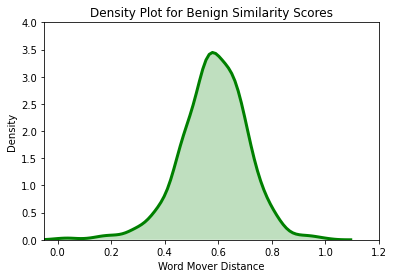

In [34]:
# Density Plot and Histogram of all benign scores
sns.distplot(all_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.05, 1.2),ylim=(0, 4))
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

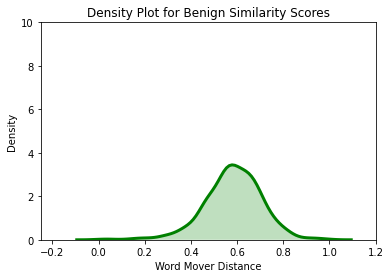

In [35]:
# Density Plot and Histogram of all benign scores
sns.distplot(all_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.25, 1.2),ylim=(0, 10))
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

In [36]:
with open('11_ben100_file_new_norm.txt', 'w') as f:
    for item in all_score:
        f.write("%s\n" % item)